## Extreme Gradient Boosting with XGBoost

### Chapter 1. Classification with XGBoost

#### 1.1 Basci topics review

**Supervised learning**:
   * problems involved **labeled data**
   * The outcome might be *binary or multi-class*
   * Common evaluation metric: ROC-AUC curve, accuracy, and confusion matrix

**Data requirements**:
   * Features should be either numeric or categorical
   * Numeric features should be scaled (Z-scored)
   * Categorical features should be encoded (one-hot)



#### 1.2 Introducing XGBoost

What is XGBoost?

* Optimized gradient-boosting machine learning library
* Originally written in C++
* Has APIs in many languages:
    * Python
    * R
    * Scala
    * Julia
    * Java

What makes XGBoost so popular?

1. speed and performance
2. core algorithm is parallelizable
3. consistently outperforms single-algorithm methods
4. state-of-art performance in many (ML)Machine Learning tasks

In [1]:
# XGBoost example in scikit-learn
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# find dataset
churn_data = pd.read_csv('5_datasets/telecom_churn_clean.csv')
# print(churn_data.head())

# extract and split data
X, y = churn_data.iloc[:, :-1], churn_data.iloc[:, -1]
# X, y = churn_data.drop('churn', axis=1), churn_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

# create a XGB classification model
xg_cl = xgb.XGBClassifier(objective='binary:logistic',
                         n_estimators=10,
                         seed=123)
xg_cl.fit(X_train, y_train)
y_pred = xg_cl.predict(X_test)

# compute the accuracy (2 ways)
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy_2 = accuracy_score(y_test, y_pred)
print('Accuracy: %f' %accuracy)
print('Accuracy score: {:.3f}'.format(accuracy_2))


Accuracy: 0.964018
Accuracy score: 0.964


#### 1.3 Decision Tree

* XGBoost is an ensemble algorithm method
* It used decision trees as its base learners
* Composed of a series of binary questions
* At the bottom of each decision tree, there is a single possible decision/ prediction
* It is constructed iteratively until a stopping criterion is met
* Individual desicion trees tend to overfit
* It means that individual decision trees are in general **low-bias, high-variance** learning models
* XGBoost uses **CART** (classification and regression trees)
* Each leaf always contains a real-value score
* It can be converted into categories if necessary

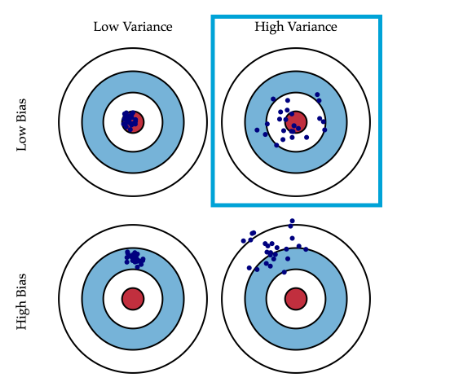

In [2]:
from IPython import display
display.Image("Images/5_dt_bias_variance.PNG")

In [3]:
# decision tree in scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# get dataset
breast_cancer = pd.read_csv('5_datasets/breast_cancer.csv')
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
X = breast_cancer.drop(['id','diagnosis', 'Unnamed: 32'], axis=1)
y = breast_cancer['diagnosis']=='M'
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

# create a DT classification model
dt_clf_4 = DecisionTreeClassifier(max_depth=4, random_state=1)
dt_clf_4.fit(X_train, y_train)
y_pred_4 = dt_clf_4.predict(X_test)

# compute the accuracy
accuracy = accuracy_score(y_test, y_pred_4)
# accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print('Accuracy: %f' %accuracy)

Accuracy: 0.947368


#### 1.4 Boosting

Boosting is not a specific meachine learning algorithm, it is a concept that can be applied to a set of machine learning models, it can be called a **"meta-algorithm"**.

In short, boosting is an ensemble meta-algorithm used to convert a collection of **weak learners** into a **stronger learner**.

How does it work?

1. Iteratively learning a set of weak models on **subsets** of the data
2. **Weighing** each weak prediction according to each weak learner's performance
3. Combine the weighed predictions to obtain a **single weighted prediction**
4. Then the result is **much better** than the individual predictions themselves!

Boosting with Cross-Validation:
* Boosting works with Cross-Validation as well, and it's **built-in**
* The dataset needs to be converted to a structure called *DMatrix*
* *DMatrix* helps to improve performance and efficiency

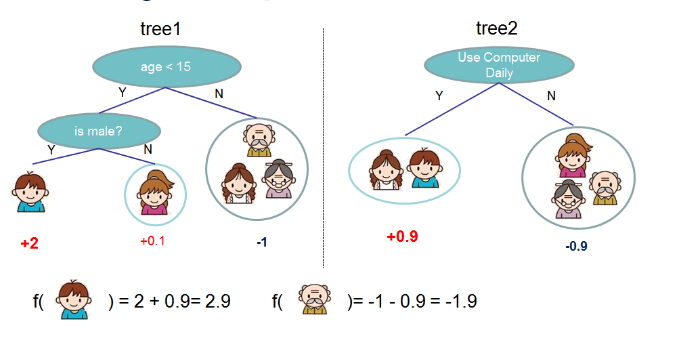

In [5]:
# Boosting example
from IPython import display
display.Image("Images/5_boosting_example.PNG")

In [6]:
# xgboost with cross-validation in scikit-learn
import pandas as pd
import xgboost as xgb

# get dataset
churn_data = pd.read_csv('5_datasets/telecom_churn_clean.csv')

# extract data and create DMatrix
X, y = churn_data.iloc[:, :-1], churn_data.iloc[:, -1]
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# create the parameter dictionary for cross-validation
params = {'objective': 'reg:logistic', 'max_depth':3}

# perform cross-validation measuring accuracy
cv_results = xgb.cv(params=params,
                    dtrain=churn_dmatrix, nfold=3, 
                    num_boost_round=5, metrics='error',
                    as_pandas=True, seed=123)
print("Error results table:")
print(cv_results)

# print the accuracy
print('Accuracy: %f' %(1-cv_results['test-error-mean']).iloc[-1])

Error results table:
   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.091809         0.003729         0.100810        0.009031
1          0.091209         0.003414         0.102310        0.010505
2          0.085059         0.000735         0.096310        0.013471
3          0.079358         0.004682         0.093609        0.012143
4          0.076208         0.004893         0.092109        0.016006
Accuracy: 0.907891


In [7]:
# perform cross-validation measuring AUC
cv_results = xgb.cv(params=params,
                    dtrain=churn_dmatrix,nfold=3,
                    num_boost_round=5, metrics='auc',
                    as_pandas=True, seed=123)
print("AUC results table:")
print(cv_results)
print('AUC: %f' %(cv_results["test-auc-mean"]).iloc[-1])

AUC results table:
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.836970       0.004261       0.823101      0.022819
1        0.852943       0.015413       0.842076      0.016330
2        0.884122       0.009758       0.872564      0.028379
3        0.898340       0.001999       0.886186      0.017050
4        0.903081       0.001136       0.891238      0.017270
AUC: 0.891238


#### 1.4 When should I use XGBoost?

When to use:

1. You have large number of training samples (> 1000 samples, < 100 features)
2. You have a mixture of categorical and numerical features or just numerical features

When **NOT** to use:

1. Image recognition (better with deep learning)
2. Computer vision (better with deep learning)
3. Natural Language Processing (NLP) and understanding problems (better with deep learning)
4. When the number of training samples is smaller than the number of features

### Chapter 2. Regression with XGBoost

#### 2.1 Regression review

What is a regression problem?
* The outcome is *real-valued*

Common regression metrics:
* Root mean squared error (RMSE)
* Mean absolute error  (MAE)

Common regression models:
* Linear regression
* Decision Trees


#### 2.2 Loss functions and base learners

* Loss function quantifies how far off a prediction is from the actual result
* It measures difference between predicted and measured data
* Our goal is to minimize the loss function of all the data points we pass in

* The loss function names in XGBoost:
    1. reg:linear -> use for regression problems
    2. reg:logistic -> use for classification problems when you want just decision, not probability
    3. binary:logistic -> use for classification problems when you want probability rather than decision

* XGBoost is an ensemble meta-model that is composed of many individual models that combine to give a final prediction
* Individual models = base learners
* Base learners are learners that are slightly better than random guess
* Two kinds of base learners in XGBoost:
    1. Tree (default booster)
    2. Linear (requires to build your own training model)

In [8]:
# decision trees as base learners for XGBoost in scikit-learn
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# get dataset
housing_prices = pd.read_csv('5_datasets/ames_housing_prices(preprocessed).csv')
print(housing_prices.head())

# extract and split data
X, y = housing_prices.iloc[:, :-1], housing_prices.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

# create the XGBRegressor model
xg_reg = xgb.XGBRegressor(objective='reg:linear',
                          n_estimators=10,
                          random_state=123)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)

# compute the RMSE
rmse = np.sqrt(mse(y_test, preds))
print('RMSE: %f' %rmse)

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   Remodeled  GrLivArea  BsmtFullBath  BsmtHalfBath  ...  HouseStyle_1.5Unf  \
0          0       1710             1             0  ...                  0   
1          0       1262             0             1  ...                  0   
2          1       1786             1             0  ...                  0   
3          1       1717             1             0  ...                  0   
4          0       2198             1             0  ...                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseSty

In [9]:
# linear as base learners for XGBoost in scikit-learn
# it is uncommon, you have to build your own xgb.train() model
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# get dataset
housing_prices = pd.read_csv('5_datasets/ames_housing_prices(preprocessed).csv')

# extract, split data and convert to DMatrix
X, y = housing_prices.iloc[:, :-1], housing_prices.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

# create params dict
params = {"booster":"gblinear", "objective":"reg:linear"}

# create your own train model
xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=5)
preds = xg_reg.predict(DM_test)

# compute the RMSE
rmse = np.sqrt(mse(y_test, preds))
print("RMSE: %f" %rmse)

[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 44604.279537


In [10]:
# evaluating model quality with Cross-Validation XGBoost model
import pandas as pd
import xgboost as xgb

# get dataset and convert to DMatrix
housing_prices = pd.read_csv('5_datasets/ames_housing_prices(preprocessed).csv')
X, y = housing_prices.iloc[:, :-1], housing_prices.iloc[:, -1]
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# create params dict
params={"objective":"reg:linear", "max_depth":4}

# create CV XGBoost model to measure RMSE
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params,
                    nfold=4, num_boost_round=5, metrics="rmse",
                    as_pandas=True, seed=123)

print(cv_results)
print('Test RMSE: %f' %(cv_results["test-rmse-mean"]).tail(1))

[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    14176

In [11]:
# create CV XGBoost model to measure MAE
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params,
                    nfold=4, num_boost_round=5, metrics="mae",
                    as_pandas=True, seed=123)

print(cv_results)
print('Test MAE: %f' %(cv_results["test-mae-mean"]).tail(1))

[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480

#### 2.3 Regularization and base learners in XGBoost

Regularization in XGBoost:

* It is a control on model complexity
* We want models to be both accurate and as simple as possible
* Regularization parameters in XGBoost:
    * Gamma: minimum loss reduction allowed for a split to occur
    * Alpha: L1 regularization of leaf weights
    * Lambda: L2 regularization on leaf weights

Base learners in XGBoost:
* Linear base learner:
    * Sum of linear terms
    * Boosted model is weighted sum of linear models *(thus is itself linear)*
    * Rarely used because it is similar to a single linear model
* Tree base learner:
    * Decision Tree
    * Boosted model is weighted sum of decision trees *(nonlinear)*
    * Almost exclusively used in XGBoost

* Use *list()* and *zip()* to create a DataFrame object from multiple equal-length lists

In [12]:
# example to create DF from multiple equal-length lists
import pandas as pd
list1 = [1, 2, 3]
list2=["a", "b", "c"]
df = pd.DataFrame(list(zip(list1, list2)), columns=["list1","list2"])
df

,list1,list2
0,1,a
1,2,b
2,3,c


In [13]:
# using regularization in XGBoost in scikit-learn
import pandas as pd
import xgboost as xgb

# get dataset and convert data to DMatrix
housing_prices = pd.read_csv('5_datasets/ames_housing_prices(preprocessed).csv')
X, y = housing_prices.iloc[:, :-1], housing_prices.iloc[:, -1]
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# create L2 params list and other params dict
reg_params=[1, 10, 100]
params={"objective":"reg:linear", "max_depth":3}

# create CV XGBoost models for loop over L2 params
rmses_l2 = []
for reg in reg_params:
    params["lambda"] = reg
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params,
                        nfold=2, num_boost_round=5, metrics="rmse",
                        as_pandas=True, seed=123)
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

print('Best rmse as a function of L2:')
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["L2", "rmse"]))

[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

In [14]:
# visualize individual XGBoost trees
# the plot didn't work
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# get datasets
housing_prices = pd.read_csv('5_datasets/ames_housing_prices(preprocessed).csv')
X, y = housing_prices.iloc[:, :-1], housing_prices.iloc[:, -1]
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# create params dict
params = {"objective":"reg:linear", "max_depth":2}

# create XGBoost regression model with params and train method
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

[14:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
# plot the trees
# the plot didn't work, so we commented the following code
"""
# first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()
# fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()
# last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")
plt.show()
"""

'\n# first tree\nxgb.plot_tree(xg_reg, num_trees=0)\nplt.show()\n# fifth tree\nxgb.plot_tree(xg_reg, num_trees=4)\nplt.show()\n# last tree sideways\nxgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")\nplt.show()\n'

[14:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


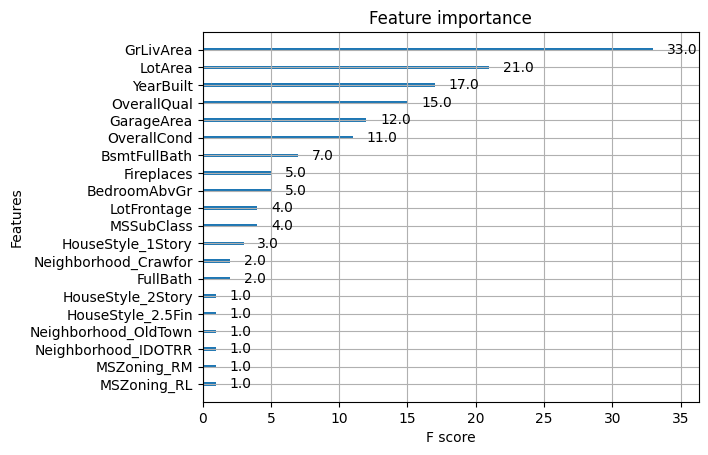

In [16]:
# visualizing feature importance

# create params dict
params = {"objective":"reg:linear", "max_depth":4}

# create XGBoost regression model with params and train method
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# plot feature importance
xgb.plot_importance(xg_reg)
plt.show()

### Chapter 3. Fine-tuning your XGBoost model

#### 3.1 Why tune your model?

* It helps to improve your model performance significantly

What is model tuning?
* About what is model tuning, refer to 4th course Chapter 5.1

**Early stopping**:
* XGBoost has automatic boosting round selection with early stopping
* It works by testing the XGBoost model after every boosting round against a hold-out dataset
* Stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds

In [17]:
# tuning your model in xgboost
# tuning number of boosting rounds
import pandas as pd
import xgboost as xgb

# get dataset and convert data to DMatrix
housing_prices = pd.read_csv('5_datasets/ames_housing_prices(preprocessed).csv')
X, y = housing_prices.iloc[:, :-1], housing_prices.iloc[:, -1]
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# create params dict and tuning list
params = {"objective":"reg:linear", "max_depth":3}
num_rounds = [3, 5, 10]

# for loop to crete CV XGBoost regression model
final_rmse_per_round = []

for curr_num_round in num_rounds:
    cv_results = xgb.cv(params=params, dtrain=housing_dmatrix,num_boost_round=curr_num_round,
           nfold=3, metrics="rmse", as_pandas=True, seed=123)
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail(1).values[-1])

# print results as DataFrame
num_rounds_rmse = list(zip(num_rounds, final_rmse_per_round))
df = pd.DataFrame(num_rounds_rmse, columns=["num_boosting_rounds", "rmse"])
df


[14:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

,num_boosting_rounds,rmse
0,3,79225.151117
1,5,50903.299752
2,10,34774.194090


In [18]:
# use early stopping as automated boosting round selection
# use the same DMatrix as above exercise

# create new params dict
params = {"objective":"reg:linear", "max_depth":4}

# create CV XGBoost model with early_stopping
cv_results = xgb.cv(params=params, dtrain=housing_dmatrix, early_stopping_rounds=10, nfold=3,
                    num_boost_round=50, metrics="rmse", as_pandas=True, seed=123)
print(cv_results)
# the boosting ended at round 49

[14:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.635216      403.633062   142640.653507     705.559723
1     103057.033818       73.768079   104907.664683     111.117033
2      75975.967655      253.727043    79262.056654     563.766693
3      57420.530642      521.658273    

#### 3.2 Overview of XGBoost hyperparameters

**Common Tree (as base learner) Hyperparameters**:
* learning rate $\eta$, it affects how quickly model fits the **residual error**
* gamma:: minimum loss reduction allowed for a split to occur
* alpha: L1 regularization of leaf weights
* lambda: L2 regularization on leaf weights
* max_depth: max depth per tree
* subsample: % of *samples* used per tree
* colsample_bytree: % *features* used per tree


**Common Linear (as base learner) Hyperparameters**:
* alpha: L1 regularization on weights
* lambda: L2 regularization on weights
* lambda_bias: L2 regularization term on bias

In [19]:
# tuning eta / learning rate in xgboost
import pandas as pd
import xgboost as xgb

# get dataset and convert data to DMatrix
housing_prices = pd.read_csv('5_datasets/ames_housing_prices(preprocessed).csv')
X, y = housing_prices.iloc[:, :-1], housing_prices.iloc[:, -1]
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# create params dict
params = {"objective":"reg:linear", "max_depth":3}

# tuning eta
eta_vals = [.001, 0.01, 0.1]
best_rmse = []

for eta in eta_vals:
    params["eta"] = eta
    cv_results = xgb.cv(params=params, dtrain=housing_dmatrix,num_boost_round=10,
                        nfold=3, early_stopping_rounds=5, metrics="rmse",
                        as_pandas=True, seed=123)
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# print result as DataFrame
df = pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta", "best_rmse"])
df

[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

,eta,best_rmse
0,0.001,195736.402543
1,0.010,179932.183986
2,0.100,79759.411808


In [20]:
# tuning max_depth in XGBoost
# use same data as above exercise

# create new params dict
params = {"objective":"reg:linear"}

# tuning max_depth
max_depths = [2, 5, 10, 20]
best_rmse = []

for depth in max_depths:
    params["max_depth"] = depth
    cv_results = xgb.cv(params=params, dtrain=housing_dmatrix, num_boost_round=10, nfold=2,
           early_stopping_rounds=5, metrics="rmse", as_pandas=True, seed=123)
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# print result as DataFrame
df = pd.DataFrame(list(zip(max_depths, best_rmse)), columns=["max_depth", "best_rmse"])
df

[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

,max_depth,best_rmse
0,2,37957.469464
1,5,35596.599504
2,10,36065.547345
3,20,36739.576068


In [21]:
# tuning colsample_bytree in XGBoost
# use same data as above

# create new params dict
params = {"objective":"reg:linear", "max_depth":3}

# tuning colsample_bytree
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

for val in colsample_bytree_vals:
    params["colsample_bytree"] = val
    cv_results = xgb.cv(params=params, dtrain=housing_dmatrix, num_boost_round=10, nfold=2,
           early_stopping_rounds=5, metrics="rmse", as_pandas=True, seed=123)
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# print result as DataFrame
df = pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree", "best_rmse"])
df

[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

,colsample_bytree,best_rmse
0,0.1,40918.116895
1,0.5,35813.904168
2,0.8,35995.678734
3,1.0,35836.044343


#### 3.3 Overview of grid search and random search

**Two common ways to tune multiple hyperparameters simultaneously**:
1. Grid Search
    * Search exhaustively over a given set of hyperparameters
    * Try every hyperparameter combinations
    * Pick final hyperparameter values that give the best CV metric score
2. Random Search
    * Create a range of hyperparameter values that you would like to search over
    * Set the number of iterations you would like
    * During each iteration, randomly draw a value in the value range for each parameter
    * After reached the maximum number of iterations, select the hyperparameter combination with the best metric score



In [22]:
# grid search in XGBoost and scikit-learn
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# get dataset and convert to DMatrix
housing_prices = pd.read_csv('5_datasets/ames_housing_prices(preprocessed).csv')
X, y = housing_prices.iloc[:, :-1], housing_prices.iloc[:, -1]
housing_dmatrix = xgb.DMatrix(data=X, label=y) # this step seems unnecessary

# create params grid for grid search
gbm_param_grid = {"colsample_bytree": [0.3, 0.7],
                  "n_estimators": [50],
                  "max_depth": [2, 5]}

# create GridSearchCV regression model
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring="neg_mean_squared_error", cv=4, verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  28986.18703093561


In [23]:
# random search in XGBoost and scikit-learn
# use same dataset as above

# create params grid for random search
gbm_param_grid = {"n_estimators": [25],
                  "max_depth": range(2, 12)}

# create RandomizedSearchCV regression model
gbm = xgb.XGBRegressor()
randomized_mse = RandomizedSearchCV(estimator=gbm,
                                    param_distributions=gbm_param_grid,
                                    scoring="neg_mean_squared_error",
                                    n_iter=5,
                                    cv=4,
                                    verbose=1)
randomized_mse.fit(X, y)
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 4}
Lowest RMSE found:  29998.4522530019


#### 3.4 Limits of grid search and random search

**Grid Search limitations**:
* Number of models build grows quickly with every additional new parameter


**Random Search limitations**:
* Parameter space to explore can be massive
* Randomly jumping throughout space looking for a "best" result becomes a waiting game


### Chapter 4. Using XGBoost in pipelines

#### 4.1 Review of pipelines in sklearn

What is a pipeline?
* It takes a list of named 2-tuples (name, pipeline_step) as input
* Tuples can contain any arbitrary scikit-learn compatible estimator or transformer object
* Pipeline implements *fit/predict* methods
* Can be used as input estimator into *grid/randomized search* and *cross_val_score* methods

Some **preprocessing** processes:
* **LabelEncoder**: converts a categorical column of strings into integers
* **OneHotEncoder**: takes the column of integers and encodes them as dummy variables
* **DictVectorizer**: typically used in text processing, converts lists of feature mappings into vectors
    * Need to convert DataFrame into a list of dictionary entries first

In [24]:
# pipeline in scikit-learn
import pandas as pd

# get dataset (unpreprocessed)
housing_prices = pd.read_csv('5_datasets/ames_housing_prices.csv')
housing_prices.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


In [25]:
# exploratory data analysis (EAD)
# check shape
print('Data Shape: ', housing_prices.shape)

# check data info
print('Data Types:')
print(housing_prices.info())

# check basic stats
print('Basic Stat: ')
print(housing_prices.describe())

Data Shape:  (1460, 21)
Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Neighborhood  1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  Remodeled     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64

In [26]:
# preprocessing: encoding categorical columns (LabelEncoder + OneHotEncoder)
from sklearn.preprocessing import LabelEncoder

# fill missing values
housing_prices.LotFrontage = housing_prices.LotFrontage.fillna(0)

# convert categorical columns (LabelEncoder)
categorical_mask = (housing_prices.dtypes==object)
categorical_columns = housing_prices.columns[categorical_mask].tolist()
le = LabelEncoder()
housing_prices[categorical_columns] = housing_prices[categorical_columns].apply(lambda x: le.fit_transform(x))

print(housing_prices[categorical_columns].head())


   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


In [27]:
# convert categorical columns (OneHotEncoder)
# we use make_column_transfer to one-hot encode multiple columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), categorical_columns),
    remainder='passthrough'
)
housing_encoded = transformer.fit_transform(housing_prices)
print(housing_encoded[:5, :])
print(housing_encoded.shape)
print(housing_prices.shape)

[[0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 6.000e+01 6.500e+01 8.450e+03
  7.000e+00 5.000e+00 2.003e+03 0.000e+00 1.710e+03 1.000e+00 0.000e+00
  2.000e+00 1.000e+00 3.000e+00 0.000e+00 5.480e+02 2.085e+05]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

In [28]:
# preprocessing: encoding categorical columns (DictVectorizer)
# LabelEncoder + OneHotEncoder can be simplified by DictVectorizer

from sklearn.feature_extraction import DictVectorizer
import pandas as pd

# get dataset (unpreprocessed)
housing_prices = pd.read_csv('5_datasets/ames_housing_prices.csv')

# convert DataFrame into dict
housing_dict = housing_prices.to_dict("records")

# create DictVectorizer
dv = DictVectorizer(sparse=False)
housing_dv = dv.fit_transform(housing_dict)
print(housing_dv[:5, :])
print(dv.vocabulary_)

[[3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 2.000e+00 5.480e+02 1.710e+03 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  8.450e+03 6.500e+01 6.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 7.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 2.000e+00 4.600e+02 1.262e+03 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.600e+03 8.000e+01 2.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

In [29]:
# combine: preprocessing with a pipeline
import pandas as pd
import xgboost as xgb
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# get dataset
housing_prices = pd.read_csv('5_datasets/ames_housing_prices.csv')

# extract and split data
X = housing_prices.iloc[:, :-1]
y = housing_prices.iloc[:, -1]

# fill missing values
X.LotFrontage = X.LotFrontage.fillna(0)

# set up pipeline
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]
xgb_pipeline = Pipeline(steps)
xgb_pipeline.fit(X.to_dict("records"), y)

Pipeline(steps=[('ohe_onestep', DictVectorizer(sparse=False)),
                ('xgb_model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

#### 4.2 Incorporating xgboost into pipelines

* Similar pipeline processes as other machine learning models
* Introduce a new library *'sklearn_pandas'* to bridge the cap between 'sklearn' and 'pandas'
* *'CategoricalImputer'* allows for imputation of categorical variables
* *'Imputer'* for native imputation of numerical variables
* *'FeatureUnion'* allows to combine separate pipeline outputs into a single pipeline output

In [30]:
# cross-validating XGBoost model
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# get dataset
housing_prices = pd.read_csv('5_datasets/ames_housing_prices.csv')

# split data
X = housing_prices.iloc[:, :-1]
y = housing_prices.iloc[:, -1]

# fill missing values
X.LotFrontage = X.LotFrontage.fillna(0)

# create a pipeline
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]
xgb_pipeline = Pipeline(steps)

# validate the model
cross_val_scores = cross_val_score(xgb_pipeline,
                                   X.to_dict("records"), y,
                                   scoring="neg_mean_squared_error", cv=10)
print("10-Fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

[14:33:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

#### 4.3 Real-world case study (kidney dataset)

* Kidney disease case study
* Follow pipeline processes
* Tune model hyperparameters within pipeline as well

In [36]:
# categorical and numerical imputers
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# get dataset
kidney_disease = pd.read_csv('5_datasets/chronic_kidney_disease_full.csv', on_bad_lines='skip')
print(kidney_disease.head())
print(kidney_disease.info())

  'age' 'bp'   'sg' 'al' 'su'   'rbc'      'pc'       'pcc'        'ba' 'bgr'  \
0    48   80  1.020    1    0       ?    normal  notpresent  notpresent   121   
1     7   50  1.020    4    0       ?    normal  notpresent  notpresent     ?   
2    62   80  1.010    2    3  normal    normal  notpresent  notpresent   423   
3    48   70  1.005    4    0  normal  abnormal     present  notpresent   117   
4    51   80  1.010    2    0  normal    normal  notpresent  notpresent   106   

  'bu' 'sc' 'sod' 'pot' 'hemo' 'pcv' 'wbcc' 'rbcc' 'htn' 'dm' 'cad' 'appet'  \
0   36  1.2     ?     ?   15.4    44   7800    5.2   yes  yes    no    good   
1   18  0.8     ?     ?   11.3    38   6000      ?    no   no    no    good   
2   53  1.8     ?     ?    9.6    31   7500      ?    no  yes    no    poor   
3   56  3.8   111   2.5   11.2    32   6700    3.9   yes   no    no    poor   
4   26  1.4     ?     ?   11.6    35   7300    4.6    no   no    no    good   

  'pe' 'ane' 'class'  
0   no    no   

In [41]:
# replace '?' mark with NA values
kidney_disease = kidney_disease.replace('?', np.NaN)

# change column names
kidney_disease.columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc',
                          'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv',
                          'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe',
                          'ane', 'class']
print(kidney_disease.head())
print(kidney_disease.shape)
print(kidney_disease.columns)

  age  bp     sg al su     rbc        pc         pcc          ba  bgr  bu  \
0  48  80  1.020  1  0     NaN    normal  notpresent  notpresent  121  36   
1   7  50  1.020  4  0     NaN    normal  notpresent  notpresent  NaN  18   
2  62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  53   
3  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  56   
4  51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  26   

    sc  sod  pot  hemo pcv  wbcc rbcc  htn   dm cad appet   pe  ane class  
0  1.2  NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no   no   ckd  
1  0.8  NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   no   ckd  
2  1.8  NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no  yes   ckd  
3  3.8  111  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes  yes   ckd  
4  1.4  NaN  NaN  11.6  35  7300  4.6   no   no  no  good   no   no   ckd  
(397, 25)
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 

In [42]:
# split and extract data
X = kidney_disease.drop('class', axis=1)
y = kidney_disease['class']=='ckd'


In [43]:
# check number of null in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# get categorical columns
categorical_feature_mask = X.dtypes == object
categorical_columns = X.columns[categorical_feature_mask].tolist()

# get non-categorical columns
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# apply numeric imputer


# apply non-numeric imputer



age        9
bp        12
sg        47
al        46
su        49
rbc      150
pc        65
pcc        4
ba         4
bgr       43
bu        19
sc        17
sod       85
pot       86
hemo      52
pcv       69
wbcc     104
rbcc     129
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64
